## Introduzione

### Sorgente

L'articolo originale è:

Hubble, E. (1929) "A Relationship Between Distance and Radial Velocity among Extra-Galactic Nebulae," Proceedings of the National Academy of Science, 168.

##### Note

- 1 megaparsec = 3,260,000 anni luce;
- Il metodo della regressione lineare è anche detto *dei minimi quadrati*.


### Dataset

I Dati sono contenuti in un file .csv (*comma separated values*) formato da due colonne:

1. distance: Distance (in Megaparsecs) from earth
2. recession_velocity: The recesson velocity (in km/sec)

### Passi necessari per l'analisi:

1. Importare i dati in python
2. Visualizzare i dati
3. Preparare le formule per la regressione lineare
4. Calcolare i coefficienti della retta
5. Stima dell'errore
6. Estensione del dataset

### Librerie necessarie

- numpy
- matplotlib

## Import delle librerie

In [38]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Import del dataset 

In [27]:

dataset = np.loadtxt("HubbleDataset.csv", delimiter=',',skiprows=1)

print(dataset[:2])

print(type(dataset))

[[  3.20000000e-02   1.70000000e+02]
 [  3.40000000e-02   2.90000000e+02]]
<class 'numpy.ndarray'>


## Visualizzazione

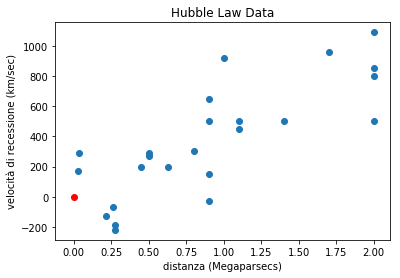

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

x = dataset[:,0]    # selezioniamo la prima colonna
y = dataset[:,1]    # selezioniamo la seconda

plt.scatter(x,y)    # plot dei vari punti 
plt.scatter(0.0,0.0,color='r')    # aggiungiamo un nuovo punto, in rosso, rappresentante la Terra

plt.xlabel('distanza (Megaparsecs)')
plt.ylabel('velocità di recessione (km/sec)')

plt.title('Hubble Law Data')

plt.show()

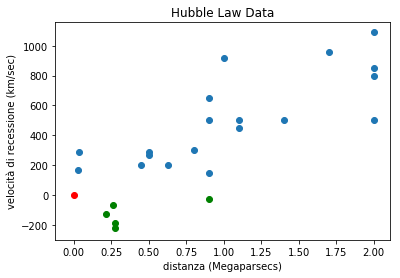

In [36]:
## Evidenziamo colori diversi

dataPos = dataset[np.where(dataset[:,1]>0)]
dataNeg = dataset[np.where(dataset[:,1]<0)]

xPos, yPos = dataPos[:,0], dataPos[:,1]
xNeg, yNeg = dataNeg[:,0], dataNeg[:,1]

plt.scatter(xPos,yPos)    # plot dei vari punti Positivi
plt.scatter(xNeg,yNeg, color='g')    # plot dei vari punti Negativi
plt.scatter(0.0,0.0, color='r')    # aggiungiamo un nuovo punto, in rosso, rappresentante la Terra

plt.xlabel('distanza (Megaparsecs)')
plt.ylabel('velocità di recessione (km/sec)')

plt.title('Hubble Law Data')

plt.show()



### Un po' di matematica

Il problema è trovare la retta che predica al meglio i dati che abbiamo. Scegliamo la retta perché è il modello
più semplice. A complicare le cose c'è sempre tempo :D

Il modello lineare è 

$$
Y = a + b X
$$


con $X$ i dati in ascissa e $Y$ i dati in ordinata. Nel nostro caso si tratta, rispettivamente di distanza e velocità.

Il problema si traduce quindi in trovare i valori dei parametri $a$ e $b$ tali da minimizzare la seguente **funzione di Costo** $C$

$$
C = \sum_{i=1}^n (Y_i-\hat{Y}_i)^2
$$

dove $\hat{Y}_i$ rappresenta il dato previsto dal modello lineare e $n$ è il numero totale di righe (punti) nel nostro dataset.

Facendo due conti con derivate e sommatorie, si può mostrare che (spero di averlo fatto a lezione):

$$
b =
\frac{
    \sum_{i=1}^n ( X_i - \bar{X} )(Y_i - \bar{Y})
}{
    \sum_{i=1}^n ( X_i - \bar{X} )^2
}
$$
e
$$
a = \bar{Y} - b \bar{X}
$$

dove le quantità con la barra in alto rappresentano le **quantità medie**

$$
\bar{X} = \frac{1}{n}\sum_{i=1}^n X_i
\ ; \qquad\qquad
\bar{Y} = \frac{1}{n}\sum_{i=1}^n Y_i
$$

Non ci resta che calcolare i coefficienti con Python o Numpy. 

In [127]:
x = dataset[:,0]    # selezioniamo la prima colonna
y = dataset[:,1]    # selezioniamo la seconda

# calcolo le medie

tot = 0
for i in x:
    tot += i
xMean0 = tot/len(x)

tot = 0
for i in y:
    tot += i
yMean0 = tot/len(y)

print(xMean0, yMean0)


# Calcolo ora b, per prima cosa calcolo il numeratore

datasetLen = len(x)

bNum = 0
for i in range(datasetLen):
    xi = x[i]
    yi = y[i]
    bNum += (xi-xMean)*(yi-yMean)

bDen = 0
for i in range(datasetLen):
    xi = x[i]
    yi = y[i]
    bDen += (xi-xMean)**2

print("Il numeratore è {0:.2f}, il denominatore è {1:.2f}, quindi b={2:.2f}".format(bNum,bDen,bNum/bDen))

b = bNum/bDen

a = yMean0 - b*xMean0

print("a={0:.2f}".format(a))


0.911375 373.125
Il numeratore è 4352.33, il denominatore è 9.58, quindi b=454.16
a=-40.78


In [128]:
# rifaccio lo stesso conto con numpy

xMean = np.mean(x)
yMean = np.mean(y)

print(xMean0-xMean, yMean0-yMean)

# Calcolo ora b con numpy

bNumerator = np.sum(np.multiply((x-xMean),(y-yMean)))
bDenominator = np.sum(np.power(x-xMean,2))


print("Con numpy, Il numeratore è {0:.2f}, il denominatore è {1:.2f}, quindi b={2:.2f}"\
      .format(bNumerator,bDenominator,bNumerator/bDenominator))

b = bNumerator/bDenominator

# calcoliamo a

a = yMean - b*xMean

print("a={0:.2f}".format(a))

0.0 0.0
Con numpy, Il numeratore è 4352.33, il denominatore è 9.58, quindi b=454.16
a=-40.78


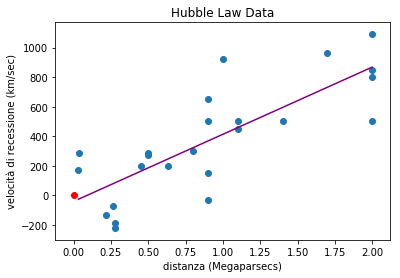

In [129]:
# Plottiamo il risultato!

xR = np.linspace(min(x),max(x),2)
yR = a + b*xR

plt.plot(xR,yR,'purple')

plt.scatter(x,y)    # plot dei vari punti 
plt.scatter(0.0,0.0,color='r')    # aggiungiamo un nuovo punto, in rosso, rappresentante la Terra

plt.xlabel('distanza (Megaparsecs)')
plt.ylabel('velocità di recessione (km/sec)')

plt.title('Hubble Law Data')

plt.show()

<function matplotlib.pyplot.show>

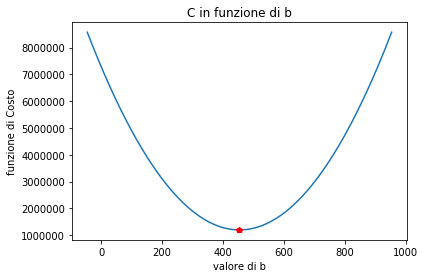

In [98]:
# mostriamo graficamente che il b trovato minimizza la funzione di costo C

C0 = np.sum( np.multiply((y - a-b*x),(y - a-b*x)))

bx = b - np.linspace(-500,500,500)

Clist = []

for bi in bx:
    ClistI = np.sum( np.multiply((y - a-bi*x),(y - a-bi*x)))
    Clist.append(ClistI)
    
plt.plot(bx, Clist)
plt.plot(b,C0,'rp')

plt.xlabel('valore di b')
plt.ylabel('funzione di Costo')

plt.title('C in funzione di b')

plt.show

### Stimiamo l'errore

E' possibile ipotizzare una distribuzione *normale* delle misure, in questo caso l'errore stimato può essere calcolato tramite la formula seguente:

$$
\sigma_{est} = \sqrt{\frac{\sum_{i=1}^n(Y_i-\hat{Y}_i)^2}{n-2}}
$$

Purtroppo serve un po' di statistica per riuscire a discutere questo risultato. Spero di arrivarci!

Intanto facciamo il conto. L'errore trovato sarà l'errore sulla stima della velocità e sarà ovviamente misurato 
in km/sec.

In [122]:
somma = 0
for i in range(len(y)):
    #print(i)
    somma += (y[i] - a-b*x[i])**2

sigmaEst = np.sqrt(somma/(len(y)-2))
sigmaEst

232.9106701830066

In [124]:
# facciamolo con numpy

sigmaEst = np.sqrt(np.sum( np.multiply((y - a-b*x),(y - a-b*x)))/(len(y)-2))
sigmaEst

232.9106701830066

### Il modello lineare è corretto?

Per sapere se la nostra assunzione di modello lineare è corretta, utilizziamo il **sample Pearson correlation coefficient** $r$ (detto anche coefficiente di correlazione) che misura il grado di dipendenza lineare tra due variabili

$$
r = \frac{\sum_{i=1}^n(X_i-\bar{X})(Y_i-\bar{Y})}{
\sqrt{\sum_{i=1}^n (Y_i-\bar{Y})^2}\sqrt{\sum_{i=1}^n (X_i-\bar{X})^2}
}
$$

- r assume valori nell’intervallo $[−1, 1]$;

- r > 0 se, e solo se la relazione tra x e y è diretta, (a valori più grandi di x
corrispondono valori più grandi di y);

- r < 0 se, e solo se relazione tra y e x è inversa (a valori più grandi di x
corrispondono valori più piccoli di y);

- se $r = \pm 1$ allora la regressione è perfetta e in questo caso i punti sono
allineati;

- se r = 0 non c'è dipendenza lineare tra le due variabili.

Quindi, se i valori sono maggiori di zero (meglio sarebbe se fossero vicino ad $1$), il modello lineare è sufficientemente buono. 

Il numeratore è legato alla **covarianza** $cov(X,Y)$, mentre il denominatore è il prodotto della **deviazione standard** $\sigma$ di $X$ con quella di $Y$:

$$
cov(x,y) = \frac{1}{n}\sum_i^n (X_i-\bar{X})(Y_i-\bar{Y})
\qquad\qquad\qquad
\sigma = \sqrt{\frac{\sum_i^n (X_i-\bar{X})^2}{n}}
$$

Svolgendo i calcoli, vediamo che il coefficiente $r\sim 0.79$. E' quindi più che lecito utilizzare un modello lineare.

In [142]:
# primo metodo: tutto a mano con solo le funzioni vettoriali di numpy

rNum = np.sum( np.multiply((x-xMean),(y - yMean)))

rDen1 = np.sqrt(np.sum( np.multiply((x-xMean),(x-xMean))))
rDen2 = np.sqrt(np.sum( np.multiply((y-yMean),(y-yMean))))

rCoef = rNum/(rDen1*rDen2)
rCoef

0.78963948793531835

In [137]:
# secondo metodo: usando la funzione dev standard di numpy

MyCov = np.sum( np.multiply((x-xMean),(y - yMean)))/len(y)
rDen = np.std(x)*np.std(y)

rCoef = MyCov/rDen
rCoef

0.78963948793531835

In [140]:
# terzo metodo: solo con le funzioni di numpy

rCoef = np.cov(np.stack((x, y), axis=0), bias=True)/(np.std(x)*np.std(y))
rCoef[0,1]

0.78963948793531824

### Interpretiamo i risultati

Il nostro modello ci ha mostrato che la velocità di recessione delle galassie rispetto alla loro distanza dalla
Terra può essere approssimato da un modello lineare

$$
v_r = H_0 d + a
$$

dove il coefficiente angolare (il $b$ del calcolo sopra) prende il nome di **costante di Hubble** $H_0$ e vale

$$
H_0 \cong 454.16 \frac{km}{s\,Mpc}
$$



### Generalizziamo il codice

scriviamo ora una funzione che, dato un dataset formato da due colonne (distanza/velocità) ci restituisce i coefficienti $a$ (termine noto) e $b$ (coefficiente angolare) della regressione linare.

Sul sito della NASA è possibile estrarre i dati per tutti gli oggetti extragalattici.

http://ned.ipac.caltech.edu/ 

Provate!

In [99]:
def linReg(dataset):
    
    x = dataset[:,0]    # selezioniamo la prima colonna
    y = dataset[:,1]    # selezioniamo la seconda

# calcolo le medie con numpy:

    xMean = np.mean(x)
    yMean = np.mean(y)

# Calcolo ora b, 

    bNumerator = np.sum(np.multiply((x-xMean),(y-yMean)))
    bDenominator = np.sum(np.power(x-xMean,2))

    b = bNumerator/bDenominator

# calcoliamo a

    a = yMean - b*xMean

    return a, b
